# Decision tree based models

This week we will use the https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.# diabetes dataset. Our goal is to classify people based on their symptoms if they have diabetes or not.

#### 1. Prepare dataset
 - load the diabetes_data_upload.csv dataset
 - search for missing values and if needed, handle them!
 - encode the non numeric variables into numeric ones! For the binary features simply encode them as (0/1), do not create two separate columns for them!

#### 2. Train & visualize decision tree classifier
 - train a decision tree classifier using the sklearn API
 - use its default parameters
 - for training use all the data, this is only and exploratory task now
 - visualize the decision tree (the `plot_tree` function in sklearn will be helpful)
 - manually check for two cases if the returned Gini impurities are correct
 - in a few sentences discuss the results

#### 3.  Random forest feature importance
 - train a random forest classifier on all the data using the sklearn API
 - use default values again, but fix the random_state to 42!
 - plot the 10 most important features' importances
    - create a bar plot where the height of the bar is the feature importance
    - show the 10 features where the feature importance is the highest
    - `feature_importance` attribute is helpful

#### 4. Evaluation
 - generate prediction probabilities with a decision tree and with a random forest model
 - use 5 fold cross validation for both time (so you should get 520 predictions)
 - use default parameters for both models
 - compare the two models with ROC curves
   - why does the decision tree's ROC curve looks different?
 
#### 5. Tuning model
  - using 80/20% train/test split generate predictions for a random forest model
  - plot the AUC vs number of trees in the forest for both the traing and the test data
  - do we experience overfitting if we use too many trees?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Task 1

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

No missing values to handle.

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# encoding the values
df = df.replace( to_replace = {"No" : 0, "Negative" : 0, "Male" : 0,  "Yes" : 1, "Positive" : 1, "Female" : 1})

In [6]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Task 2

In [7]:
# separating feauters and target variables
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

In [8]:
# training a default decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree


dtc = DecisionTreeClassifier(random_state=0).fit(X, y)

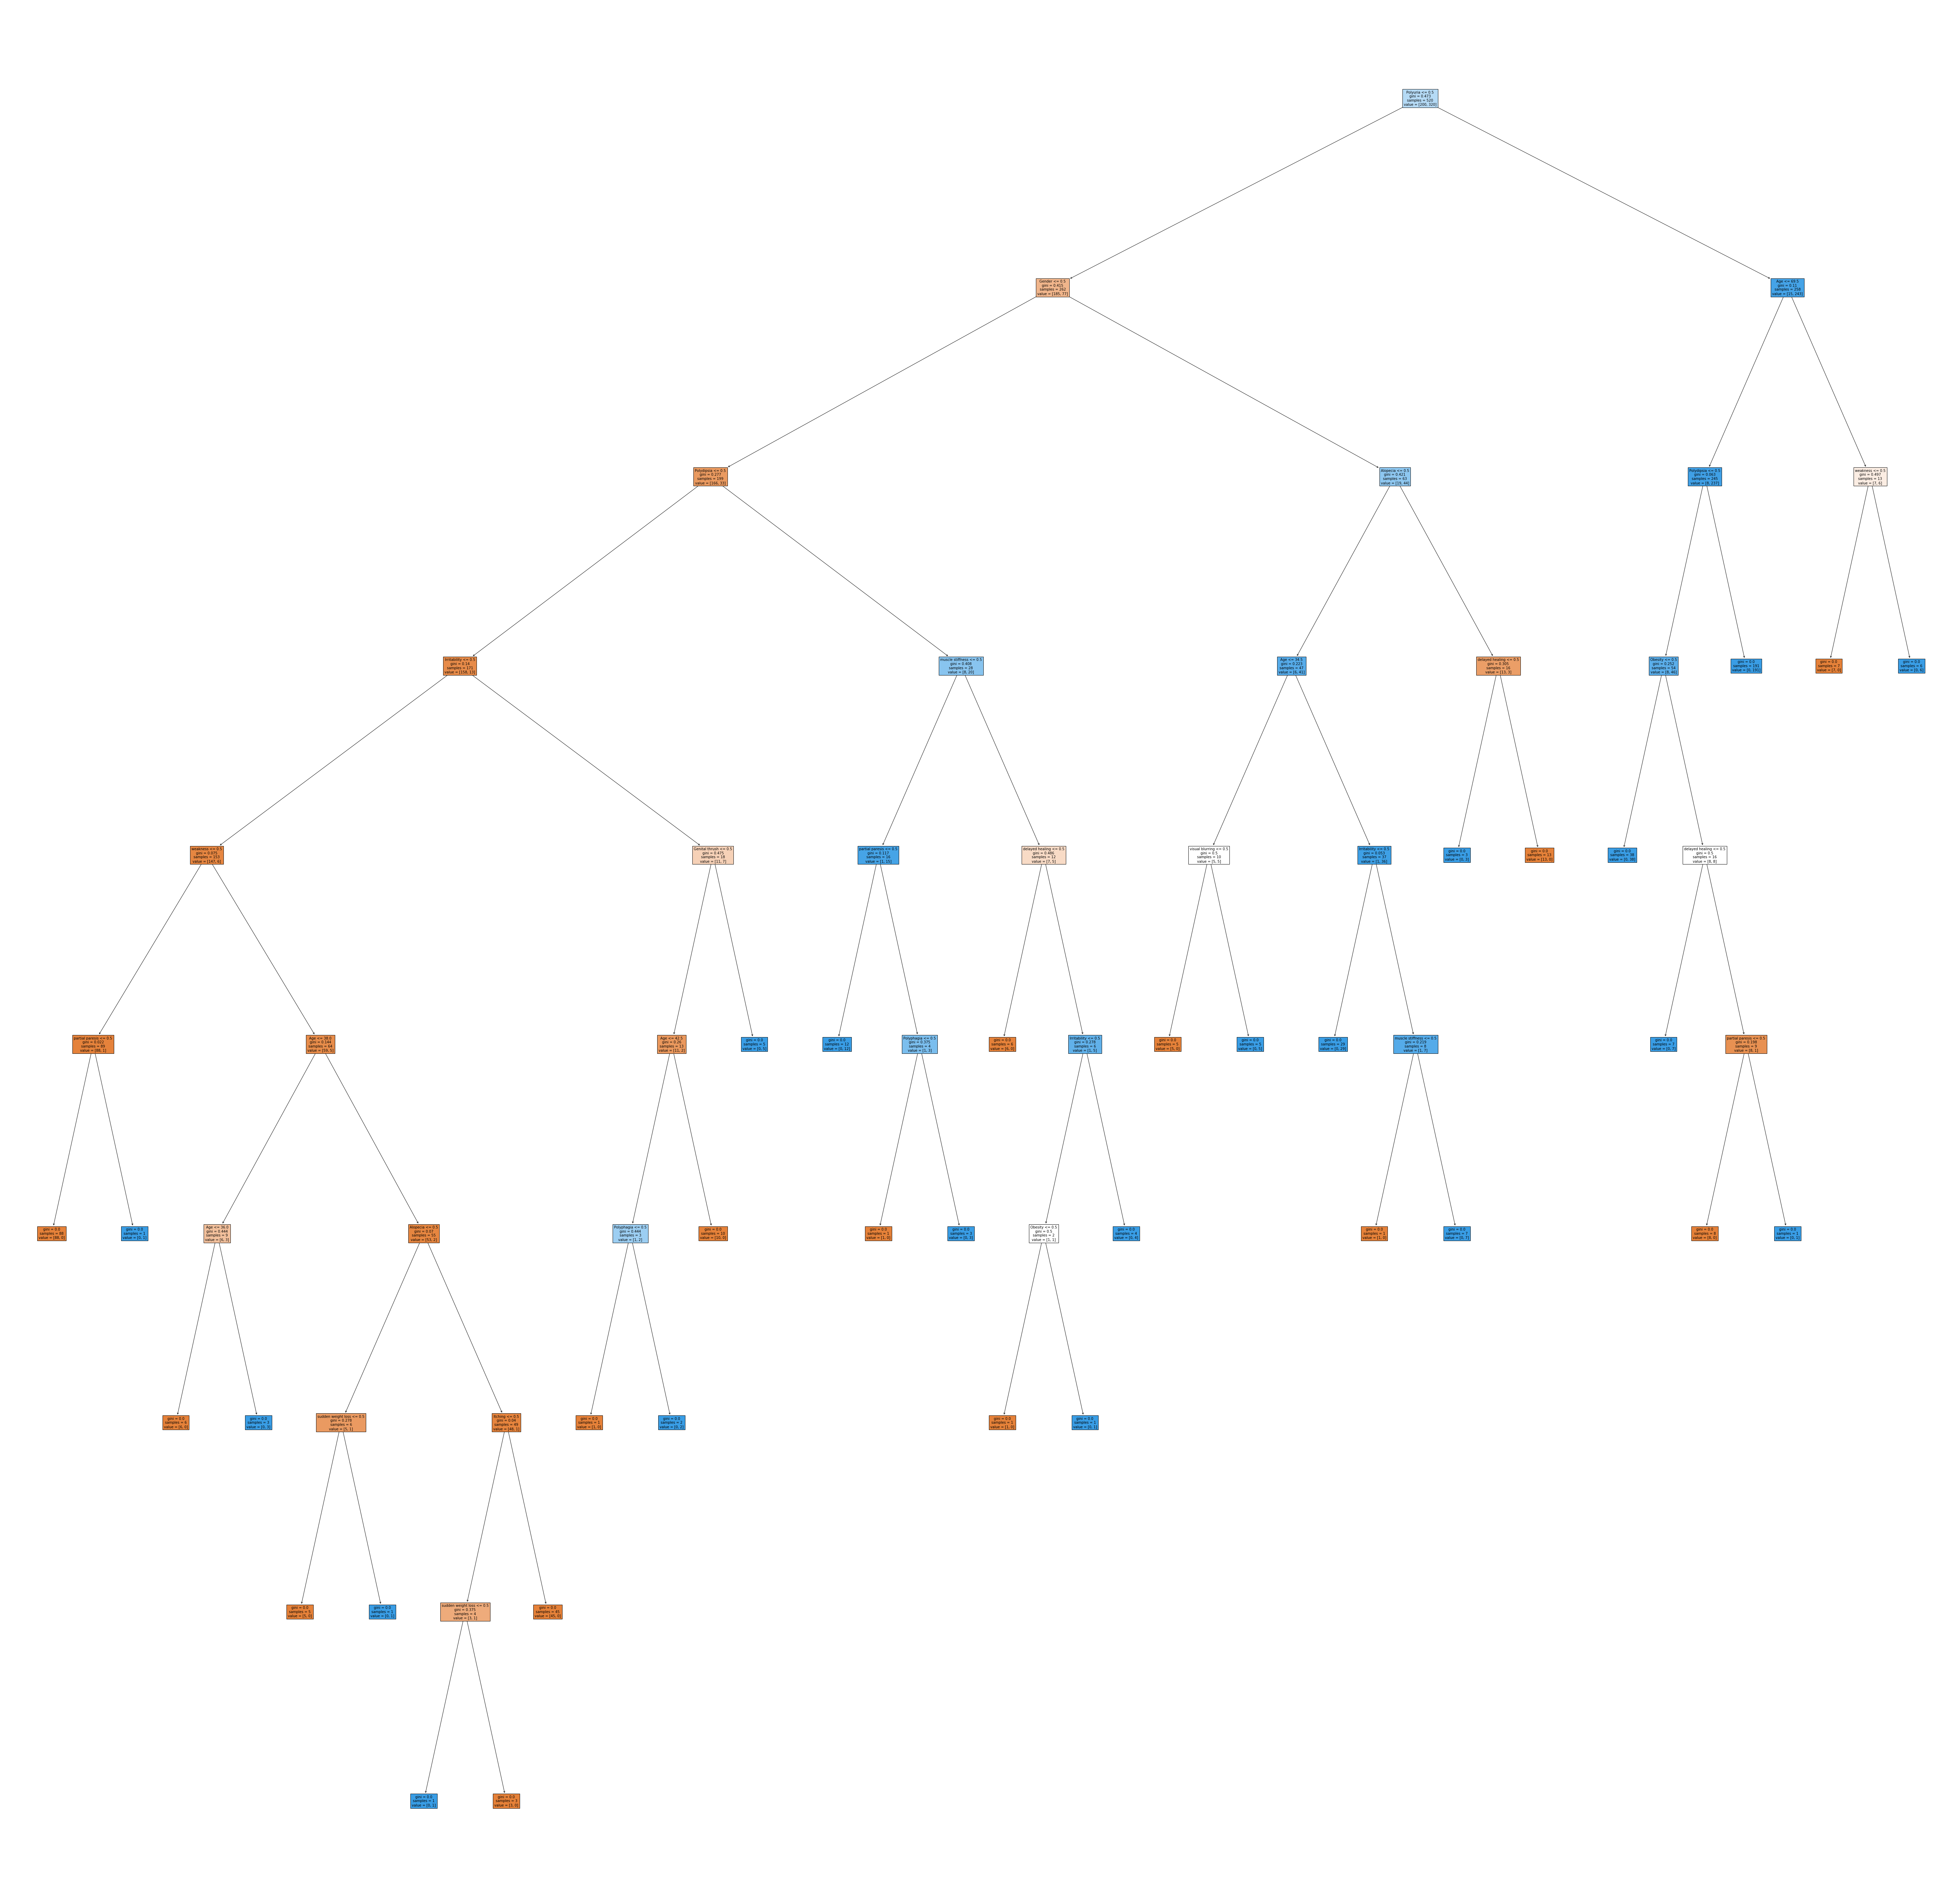

In [9]:
# visualizing the tree
plt.figure(figsize=(100, 100))
plot_tree(dtc, feature_names=df.columns, fontsize=10, filled = True)
plt.show()

In [10]:
# using seaborn style only from now on because the plot_tree method gave strange results with it
sns.set()

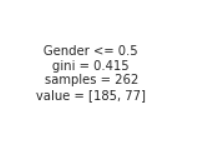

In [11]:
print(1-(185/262)**2-(77/262)**2)

0.4150399160888059


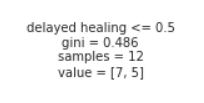

In [12]:
print(1-(7/12)**2-(5/12)**2)

0.48611111111111094


These two gini impurities match my calculations.

Since we didn't limit the growth of the tree and is fully grown, almost all of the samples in each leaf are of the same class.

# Task 3

In [13]:
# training a default random forest model
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=42).fit(X, y)

In [14]:
# creating a list of the 10 most important features and their importances
fi = [[df.columns[:-1][i], rfc.feature_importances_[i]] for i in range(len(df.columns[:-1]))]
fi = sorted(fi, key = lambda x: x[1])[::-1]

Text(0.5, 1.0, '10 most important features and their importances')

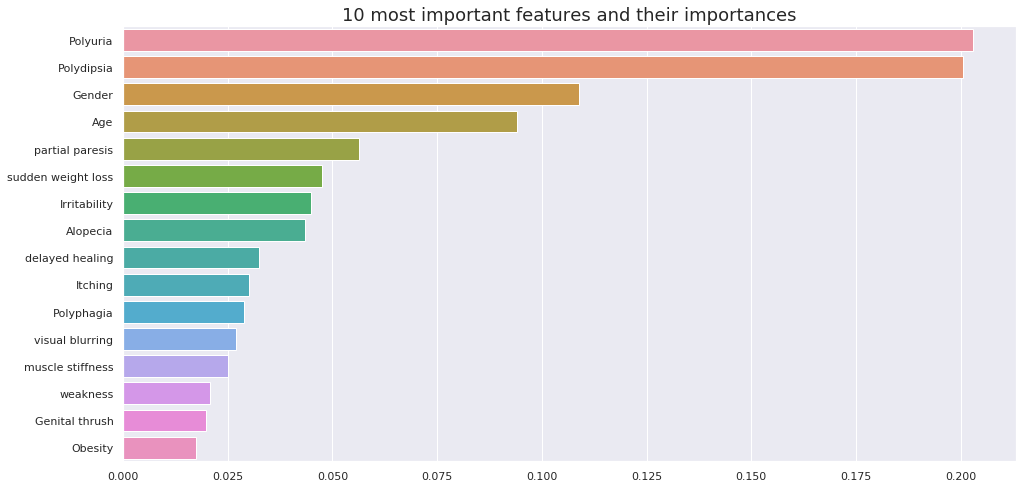

In [15]:
plt.figure(figsize=(16, 8))
sns.barplot(x=[fi[i][1] for i in range(len(fi))], y=[fi[i][0] for i in range(len(fi))])
plt.title('10 most important features and their importances', size=18)

# Task 4

In [16]:
# training a default decision tree and random forest using 5 fold cross validation
from sklearn.model_selection import cross_val_predict


tree_preds = cross_val_predict(dtc, X, y, cv=5, method='predict_proba')
forest_preds = cross_val_predict(rfc, X, y, cv=5, method='predict_proba')

In [17]:
# caluclating fpr, tpr and auc scores
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


fpr1, tpr1, thresholds= roc_curve(y_score=tree_preds[:,1], y_true=y)
roc_auc1 = roc_auc_score(y, tree_preds[:,1])

fpr2, tpr2, thresholds= roc_curve(y_score=forest_preds[:,1], y_true=y)
roc_auc2 = roc_auc_score(y, forest_preds[:,1])

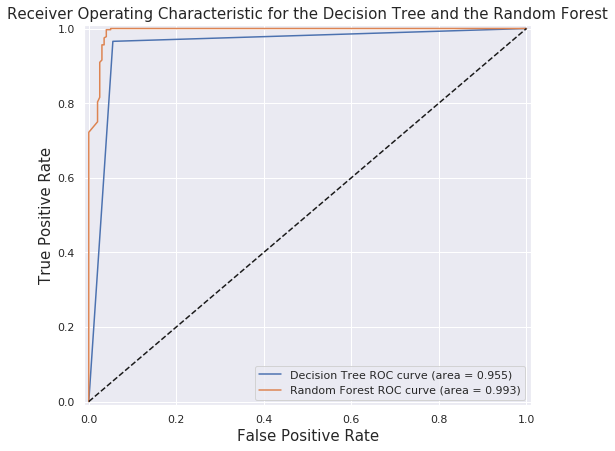

In [18]:
plt.figure(figsize=(8, 7))
plt.plot(fpr1, tpr1, label='Decision Tree ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Random Forest ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('Receiver Operating Characteristic for the Decision Tree and the Random Forest', size=15)
plt.legend(loc="lower right")

The decision tree's roc curve only has one break, that means the classifier didn't return probabilities, only hard labels 0 and 1 (learned that from my mistake in last week's homework). This behaviour is not unexpected since we let our tree to grow out fully, because of this the model fits the training data "perfectly".

# Task 5

In [19]:
# splittin the data into train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# calculating the auc score for various tree numbers
trees = np.arange(1, 30, 10)
auc_train = []
auc_test = []

for i in range(len(trees)):
    forest = RandomForestClassifier(random_state=0, n_estimators=trees[i]).fit(X_train, y_train)
    predict_train = forest.predict_proba(X_train)
    predict_test = forest.predict_proba(X_test)

    auc_train.append(roc_auc_score(y_train, predict_train[:,1]))
    auc_test.append(roc_auc_score(y_test, predict_test[:,1]))

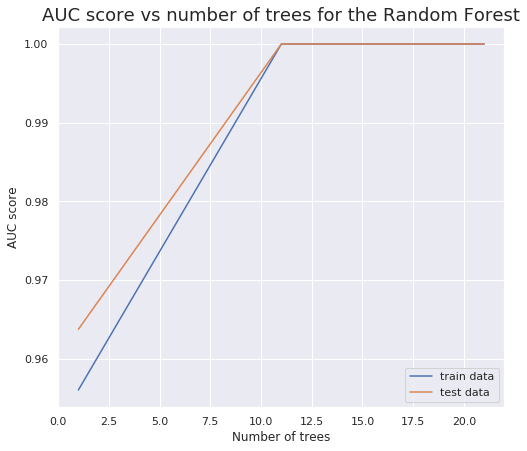

In [21]:
plt.figure(figsize=(8, 7))
plt.plot(trees, auc_train, label='train data')
plt.plot(trees, auc_test, label='test data')
plt.title('AUC score vs number of trees for the Random Forest', size=18)
plt.xlabel('Number of trees', size=12)
plt.ylabel('AUC score', size=12)
plt.legend(loc='lower right')

In my opinion we won't experience overfitting when using more trees, since the main idea behind ensemble methods is that using more models will reduce the overall variance and increase the ability to generalize well. When we are adding more trees, we are using more models.